## Import modules and functions

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims

## Read CSV file with values for stimulation

In [2]:
filename=r'/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Organotypic Slices/20191205_organotypic_analyse/silvioanalysis.CSV'

In [3]:
df=pd.read_csv(filename,sep=',',header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8
0,unblocked BIC,0.643476,0.238638,0.596929,0.455648,NaN,no block,1.884771,0.068729
1,blocked BIC,1.618950,0.857796,0.506052,0.184752,NaN,immediate block,0.850123,0.117856
2,unblocked DMSO,0.437199,0.335584,0.877958,0.301052,NaN,NaN,0.627916,0.076661
3,blocked DMSO,0.080107,0.035486,0.971102,0.213575,NaN,NaN,1.467478,0.012667
4,imediate block,1.589530,0.174815,0.301586,0.473331,NaN,NaN,0.968647,0.066527
5,NaN,0.625474,0.208215,1.660816,0.168067,NaN,NaN,0.405791,0.098331
6,NaN,0.347536,0.167105,1.660816,0.638744,NaN,NaN,0.711089,0.073711
7,NaN,0.652065,0.260173,1.424740,0.315808,NaN,NaN,0.475786,0.058285
8,NaN,1.099376,0.162903,NaN,0.185544,NaN,NaN,1.472657,0.025550
9,NaN,0.994196,0.169841,NaN,0.254294,NaN,NaN,1.135742,NaN


In [5]:
df.columns=['None','No blocking + Bic','Blocked + 12h + Bic','No blocking','Blocked + 12h','None','None','Ignore','Blocked + 0h']

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


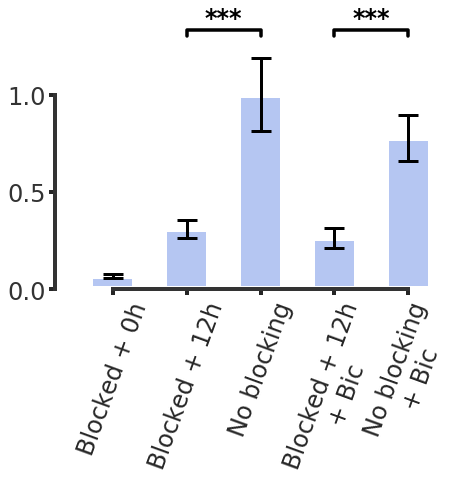

In [6]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

fig=plt.figure(figsize=(7,5))
g=fig.gca()
sns.barplot(x=[0,1,2,3,4],
            y=[df["Blocked + 0h"].mean(),
             df["Blocked + 12h"].mean(),
             df["No blocking"].mean(),
             df["Blocked + 12h + Bic"].mean(),
             df["No blocking + Bic"].mean()],
            color="#abc2fc",linewidth=6)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(g, .6)        
plt.errorbar(x=[0,1,2,3,4],
             y=[df["Blocked + 0h"].mean(),
                df["Blocked + 12h"].mean(),
                df["No blocking"].mean(),
                df["Blocked + 12h + Bic"].mean(),
                df["No blocking + Bic"].mean()],
             yerr=[df["Blocked + 0h"].sem(),
                   df["Blocked + 12h"].sem(),
                   df["No blocking"].sem(),
                   df["Blocked + 12h + Bic"].sem(),
                   df["No blocking + Bic"].sem()],
             xerr=None,
             ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

#plt.legend(['New epitopes','All epitopes'],fontsize=24)


scale_x=100
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
g.xaxis.set_major_formatter(ticks_x)
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)
plt.xticks(g.get_xticks(),["Blocked + 0h","Blocked + 12h","No blocking","Blocked + 12h\n+ Bic","No blocking\n+ Bic"],
           size=24,rotation=70)
plt.yticks(g.get_yticks(),size=24,color='#333333')
g.grid(False)

x1, x2 = 2,1
y= 1.3
h=0.03
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')

x1, x2 = 4,3
y= 1.3
h=0.03
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')



diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'13_organotypic_slices.svg', bbox_inches='tight', format='svg')

## ttests

In [7]:
dfblocked_dmso=df["Blocked + 12h"].dropna()
dfunblocked_dmso=df["No blocking"].dropna()

dfblocked_bic=df["Blocked + 12h + Bic"].dropna()
dfunblocked_bic=df["No blocking + Bic"].dropna()

[stat, pdmso]=stats.ttest_ind(dfblocked_dmso,dfunblocked_dmso)
[stat, pbic]=stats.ttest_ind(dfblocked_bic,dfunblocked_bic)

print('dmso: '+str(pdmso))
print('bic: '+str(pbic))

dmso: 0.0007008610234394278
bic: 0.00046077829821119956


## Check normality

<class 'pandas.core.series.Series'>
The variable distributes normally


Text(0.5, 1.0, 'Distribution of all conditions')

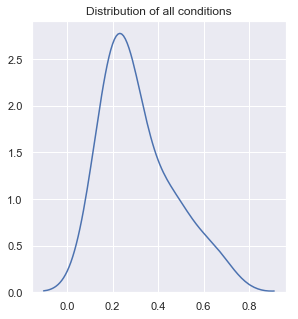

In [8]:
variable="Spont. freq" #change me

x=dfunblocked_bic
normdvar=(x-x.mean())/x.std()
print(type(normdvar))

import scipy.stats as ss
[_,pval]=ss.kstest(normdvar,'norm')
if pval<0.05:
    print("The variable does not distribute normally")
else:
    print("The variable distributes normally")

sns.set(font_scale=1)
fig=plt.figure(figsize=(10,5))
fig.add_subplot(121)
sns.kdeplot(dfblocked_dmso,legend=False)
plt.title('Distribution of all conditions')

    

## Plot without bicuculline

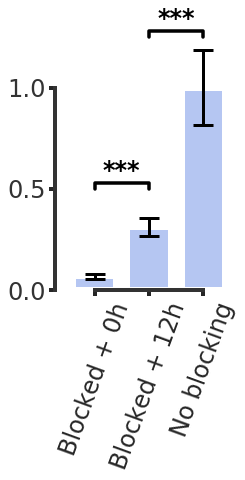

In [23]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.set_palette("Set2")
from matplotlib import ticker

fig=plt.figure(figsize=(3,5))
g=fig.gca()
sns.barplot(x=[0,1,2],
            y=[df["Blocked + 0h"].mean(),
             df["Blocked + 12h"].mean(),
             df["No blocking"].mean()],
            color="#abc2fc",linewidth=6)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        
        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(g, .8)        
plt.errorbar(x=[0,1,2],
             y=[df["Blocked + 0h"].mean(),
                df["Blocked + 12h"].mean(),
                df["No blocking"].mean()
                ],
             yerr=[df["Blocked + 0h"].sem(),
                   df["Blocked + 12h"].sem(),
                   df["No blocking"].sem()],
             xerr=None,
             ecolor='black',fmt='none',capsize=10,linewidth=3,
             capthick=3,zorder=10,
            alpha=1)

#plt.legend(['New epitopes','All epitopes'],fontsize=24)


scale_x=100
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
g.xaxis.set_major_formatter(ticks_x)
g.xaxis.set_tick_params(width=4)
g.yaxis.set_tick_params(width=4)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('',color='#333333',alpha=.7)
plt.xticks(g.get_xticks(),["Blocked + 0h","Blocked + 12h","No blocking"],
           size=24,rotation=70)
plt.yticks(g.get_yticks(),size=24,color='#333333')
g.grid(False)


x1, x2 = 0,1
y= .5
h=0.03
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')



x1, x2 = 2,1
y= 1.25
h=0.03
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col,size=24, weight='bold')



diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'13_organotypic_slices_nobic.svg', bbox_inches='tight', format='svg')

## ttests 0 and 12, 12 and no block

In [20]:
dfblocked_0=df["Blocked + 0h"].dropna()
dfblocked_12=df["Blocked + 12h"].dropna()
dfunblocked_dmso=df["No blocking"].dropna()

[stat, p012]=stats.ttest_ind(dfblocked_0,dfblocked_12)
[stat, p12ublk]=stats.ttest_ind(dfblocked_12,dfunblocked_dmso)

print('p012: '+str(p012))
print('p12ublk: '+str(p12ublk))

p012: 0.00014882942849999306
p12ublk: 0.0007008610234394278
